<h1> Drug Classification using Decision Trees and Supervised Learning </h1>
<h2>Importing the Packages<h2>

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
#Reading the dataset into a dataframe
input_file = 'C:/Users/Lenovo/Documents/Decision Tree Projects/drug200.csv'
df = pd.read_csv(input_file, header=0)

In [69]:
# Displaying the dataframe details
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h3>Converting all values into Numeric data</h3>

Here the Sex, BP and Cholesterol data are in string format, which wont be accepted by 
the decision tree for classification as it accepts numeric data. Hence we are converting 
it into numeric data.

In [70]:
d = {'M': 0, 'F': 1}
df['Sex'] = df['Sex'].map(d)
d = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP'] = df['BP'].map(d)
df['Cholesterol'] = df['Cholesterol'].map(d)
d = {'drugA':1, 'drugB':2, 'drugC':3, 'drugX':4, 'drugY':5}
df['Drug'] = df['Drug'].map(d)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,2,25.355,5
1,47,0,0,2,13.093,3
2,47,0,0,2,10.114,3
3,28,1,1,2,7.798,4
4,61,1,0,2,18.043,5


In [71]:
features = list(df.columns[0:5])
features


['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [72]:
target = list(df.columns[-1:])
target

['Drug']

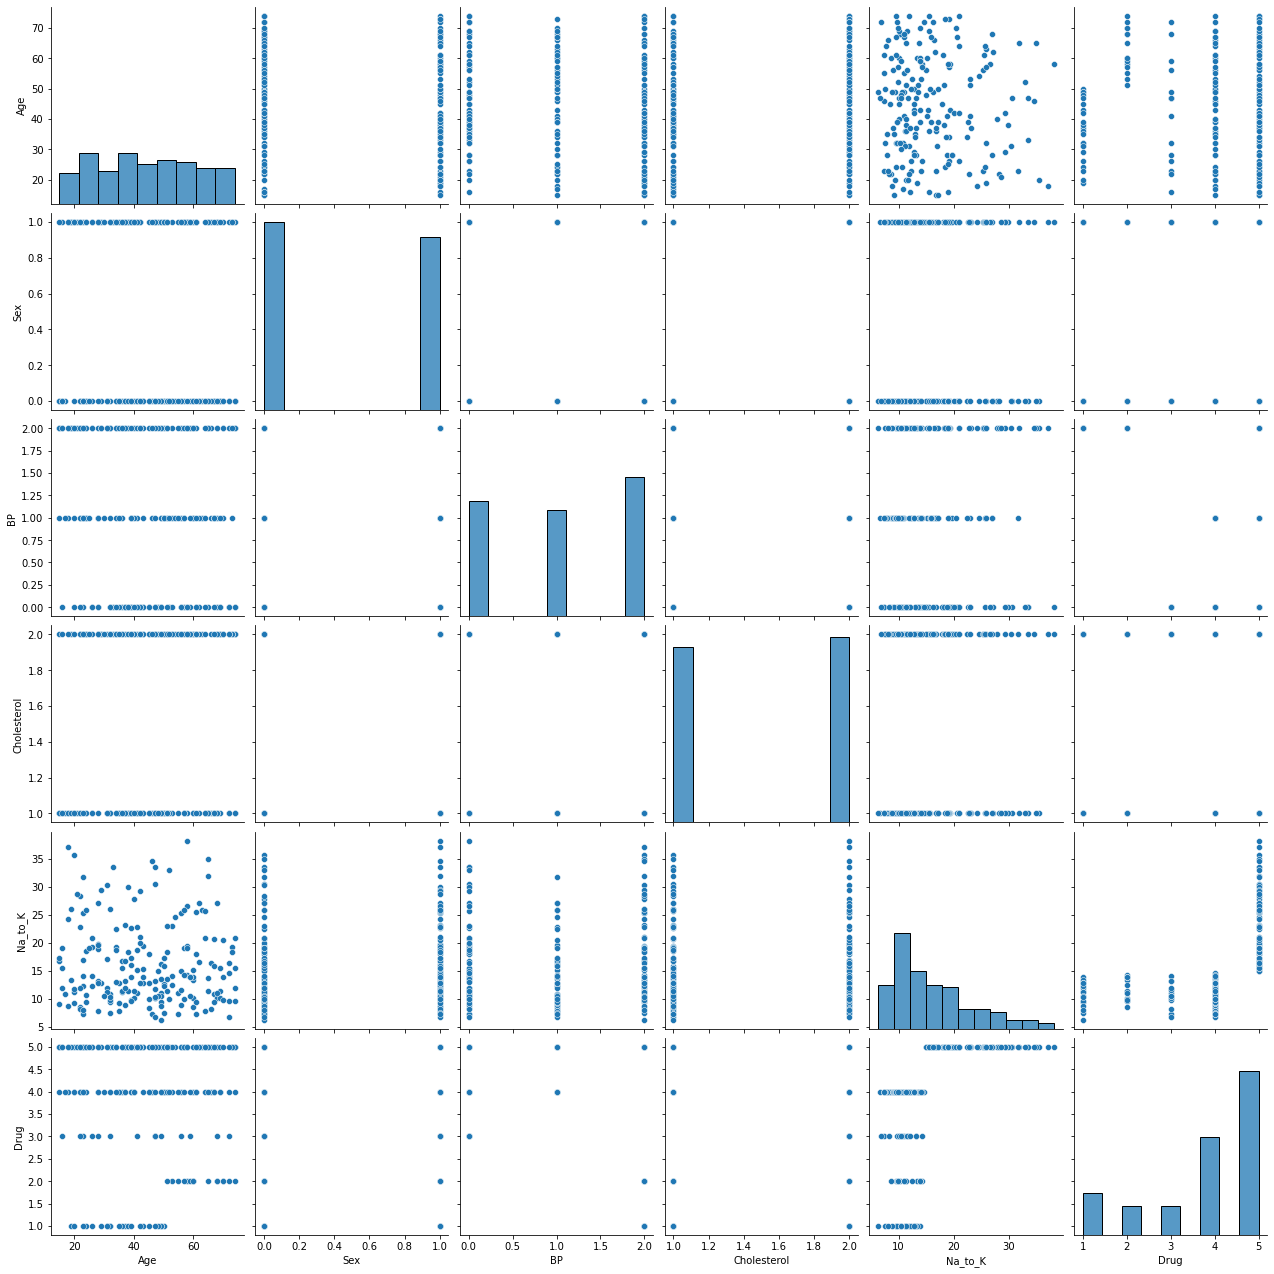

In [73]:
# Plotting a pairplot to observe the relationships among the features
sns.pairplot(df , height = 3)
plt.show()

<AxesSubplot:xlabel='BP', ylabel='Age'>

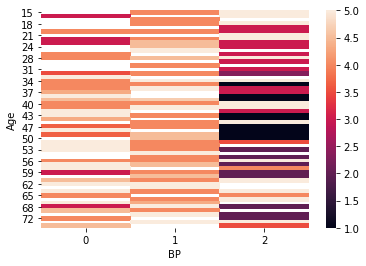

In [74]:
#Plotting a heatmap between the Age and BP values of the patient to observe the trends
df2 = df.pivot_table(index = 'Age', columns= 'BP', values= 'Drug', aggfunc= 'mean')
sns.heatmap(df2)

<h2>Decision Tree Algorithm</h2>

In [75]:
y = df.loc[:,'Drug'].values
x = df.loc[:,features].values
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
print(x)
print(y)

[[23.     1.     2.     2.    25.355]
 [47.     0.     0.     2.    13.093]
 [47.     0.     0.     2.    10.114]
 [28.     1.     1.     2.     7.798]
 [61.     1.     0.     2.    18.043]
 [22.     1.     1.     2.     8.607]
 [49.     1.     1.     2.    16.275]
 [41.     0.     0.     2.    11.037]
 [60.     0.     1.     2.    15.171]
 [43.     0.     0.     1.    19.368]
 [47.     1.     0.     2.    11.767]
 [34.     1.     2.     1.    19.199]
 [43.     0.     0.     2.    15.376]
 [74.     1.     0.     2.    20.942]
 [50.     1.     1.     2.    12.703]
 [16.     1.     2.     1.    15.516]
 [69.     0.     0.     1.    11.455]
 [43.     0.     2.     2.    13.972]
 [23.     0.     0.     2.     7.298]
 [32.     1.     2.     1.    25.974]
 [57.     0.     0.     1.    19.128]
 [63.     0.     1.     2.    25.917]
 [47.     0.     0.     1.    30.568]
 [48.     1.     0.     2.    15.036]
 [33.     1.     0.     2.    33.486]
 [28.     1.     2.     1.    18.809]
 [31.     0.

<h2>Displaying the Decision tree </h2>

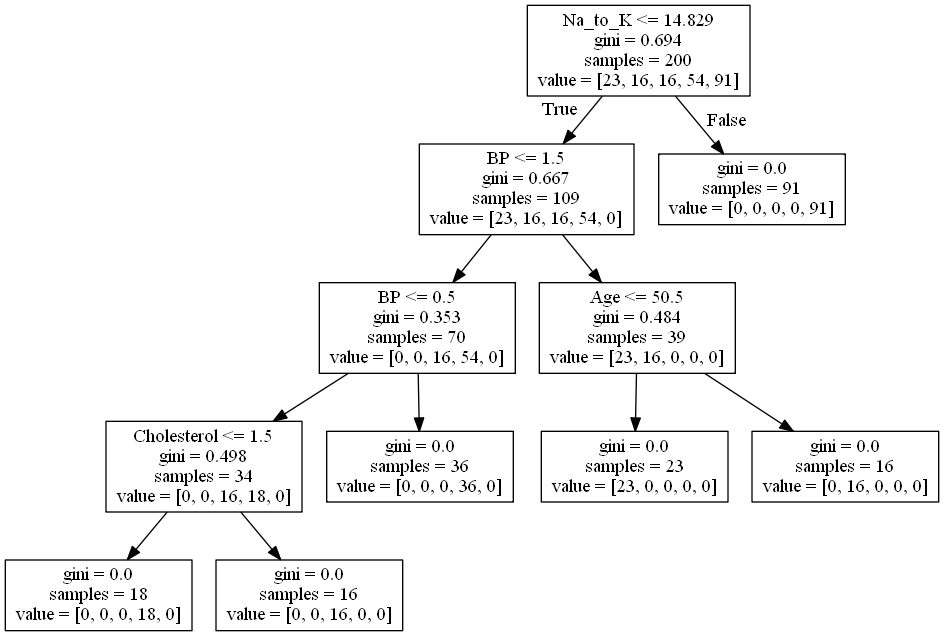

In [76]:
from IPython.display import Image
import six
import sys
import pydotplus
sys.modules['sklearn.externals.six'] = six

dot_data = six.StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                          feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<h2>Training the Model</h2>

Here we are splitting the dataset into 2 parts where we are using 80% of the dataset for training the model and
the remaining 20% for testing the model.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [78]:
print(X_train)
print(X_test)

[[42.     1.     2.     2.    21.036]
 [29.     0.     2.     2.    12.856]
 [31.     0.     2.     2.    30.366]
 [65.     1.     0.     1.    13.769]
 [51.     1.     0.     1.    23.003]
 [45.     0.     0.     1.     8.37 ]
 [60.     0.     1.     2.    15.171]
 [26.     0.     0.     1.    20.909]
 [32.     1.     2.     1.    10.292]
 [74.     0.     2.     1.    15.436]
 [28.     1.     1.     2.    19.675]
 [53.     1.     2.     1.    12.495]
 [18.     1.     2.     2.    37.188]
 [56.     1.     2.     2.    25.395]
 [22.     0.     0.     2.     8.151]
 [33.     1.     0.     2.    33.486]
 [18.     1.     1.     1.     8.75 ]
 [30.     1.     1.     2.    10.443]
 [73.     1.     1.     2.    19.221]
 [65.     0.     2.     1.    11.34 ]
 [52.     0.     0.     1.    32.922]
 [58.     1.     0.     2.    38.247]
 [59.     1.     1.     2.    13.884]
 [32.     1.     2.     1.    25.974]
 [72.     1.     0.     1.    14.642]
 [29.     1.     2.     2.    29.45 ]
 [68.     1.

In [79]:
print(Y_train)
print(Y_test)

[5 1 5 4 5 4 5 5 1 5 5 2 5 5 3 5 4 4 5 2 5 5 4 5 4 5 2 5 4 4 4 5 1 1 1 5 5
 4 4 5 1 1 2 3 2 5 3 5 2 4 4 3 5 5 3 5 5 5 5 4 3 1 5 5 5 1 4 2 4 2 5 5 5 2
 5 2 5 2 4 5 5 1 5 5 1 1 4 4 5 4 5 5 3 5 3 4 1 5 4 5 5 3 4 5 5 3 5 4 5 4 4
 5 1 4 5 5 5 5 4 5 4 2 2 5 4 1 4 2 1 1 5 5 3 4 5 4 3 4 5 5 5 4 5 1 5 4 4 1
 5 2 5 1 5 5 4 4 5 4 3 5]
[3 4 5 5 5 4 4 4 5 4 1 5 5 5 2 3 5 5 4 5 5 4 4 4 5 5 5 5 5 4 4 3 1 4 5 5 4
 5 1 4]


In [80]:
#Here we are using the XGBoost algorithm for training the model
import xgboost as xgb

train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)

In [81]:
# Defining the hyper parameters for the model and tuning them.
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 6} 
epochs = 10

In [82]:
model = xgb.train(param, train, epochs)

[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
predictions = model.predict(test)

In [84]:
#Generating the predicted values
print(predictions)

[3. 4. 5. 5. 5. 4. 4. 4. 5. 4. 1. 5. 5. 5. 2. 3. 5. 5. 4. 5. 5. 4. 4. 4.
 5. 5. 5. 5. 5. 4. 4. 4. 1. 4. 5. 5. 4. 5. 1. 4.]


In [85]:
#comparing the predicted values with actual values
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
comparison

,Actual,Predicted
0,3,3.0
1,4,4.0
2,5,5.0
3,5,5.0
4,5,5.0
5,4,4.0
6,4,4.0
7,4,4.0
8,5,5.0
9,4,4.0


<h2>Evaluation of the model</h2>

We are going to test the model with various metrics and find its accuracy.

In [86]:
from sklearn.metrics import r2_score

r2 = np.sqrt(r2_score(Y_test,predictions))

print("R-squared score:",r2)

R-squared score: 0.990407452133237


In [87]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,predictions)
print("Accuracy score: ",acc)

Accuracy score:  0.975


In [88]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test,predictions))

print("RMSE value: ",rmse)

RMSE value:  0.15811388300841897


<h2>Plotting the predicted vs the actual values of the Drug</h2>

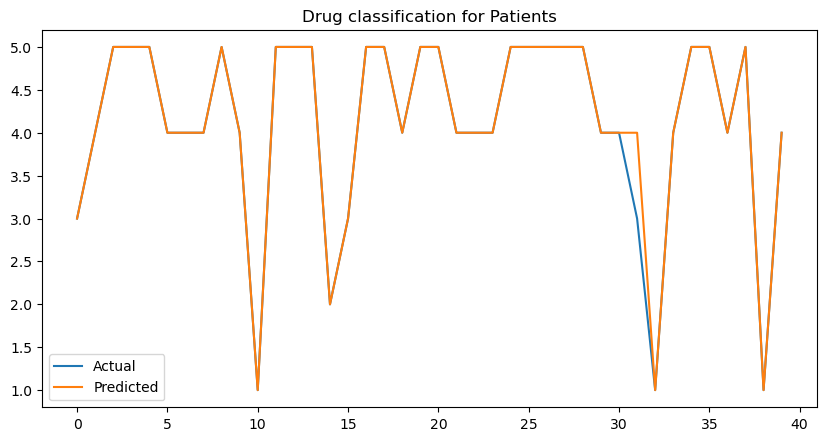

In [89]:
plt.figure(figsize=(10, 5), dpi=100)
range_len= range(len(Y_test))
plt.plot(range_len, Y_test, label="Actual")
plt.plot(range_len, predictions, label="Predicted")
plt.title("Drug classification for Patients")
plt.legend()
plt.show()

<h2>Making a prediction for user defined input</h2>

In [97]:
data = np.array([[63, 0, 1, 1, 33.2]])
dtest = xgb.DMatrix(data)
ypred = model.predict(dtest)
print(ypred)


[5.]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

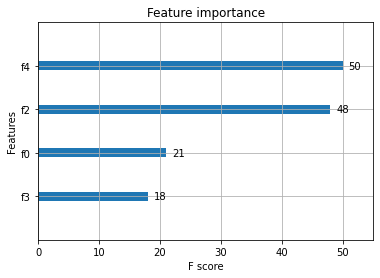

In [96]:
xgb.plot_importance(model)

In this code , we have classified the data using a Decision tree by training the model using XGBoost Algorithm.
In the above code we tried to find the best drug for the patient based on their age,Blood pressure,cholesterol and sodium-potassium level in blood and tried to attain maximum accuracy.Thank you :)